# Karar Ağaçları Algoritması ile Çalışma

Bu notebook, Karar Ağaçları algoritmasını tanıtacak ve bu algoritmanın bir veri seti üzerinde nasıl uygulanacağını gösterecektir.

## İçindekiler
1. Karar Ağaçları Algoritmasının Tanıtımı
2. Karar Ağaçlarının Teorik Temelleri
3. Karar Ağaçları ile Uygulama
    - Veri Yükleme ve Keşifsel Veri Analizi
    - Veri Ön İşleme
    - Modelin Eğitilmesi
    - Modelin Tahmin Yapması
    - Modelin Değerlendirilmesi
    - Modelin Görselleştirilmesi
4. Model Değerlendirmesi ve Karşılaştırmalar
5. Hiperparametre Optimizasyonu
6. Sonuç ve Yorum


### 1. Karar Ağaçları Algoritmasının Tanıtımı
Karar ağaçları, denetimli öğrenme algoritmaları arasında yer alır ve sınıflandırma ile regresyon problemlerinde kullanılır. Bu algoritma, veri setini belirli kurallara göre dallara ayırarak tahminler yapar. Her bir dal, veri setindeki bir özelliğe dayalı bir karar noktasıdır.


### 2. Karar Ağaçlarının Teorik Temelleri
Karar ağaçları, kök düğümden başlayarak veri setini dallara ayırır. Bu ayrımlar, veri setindeki özelliklerin değerlerine dayalı olarak yapılır. Ağaç yapısının her bir düğümü, bir karar noktasıdır ve yaprak düğümler, nihai sınıfları veya değerleri temsil eder.

Karar ağaçları oluşturulurken, bilgi kazancı veya Gini indeksine göre en iyi ayrım noktaları seçilir. Bilgi kazancı, veri setinin entropisinin azalmasıdır. Gini indeksi ise, bir düğümdeki veri noktalarının saflığını ölçer.


### 3. Karar Ağaçları ile Uygulama
Gerekli kütüphaneleri yükleyelim ve örnek veri setini inceleyelim.

Veri Setinin İlk Beş Satırı:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Veri Seti Özeti:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             

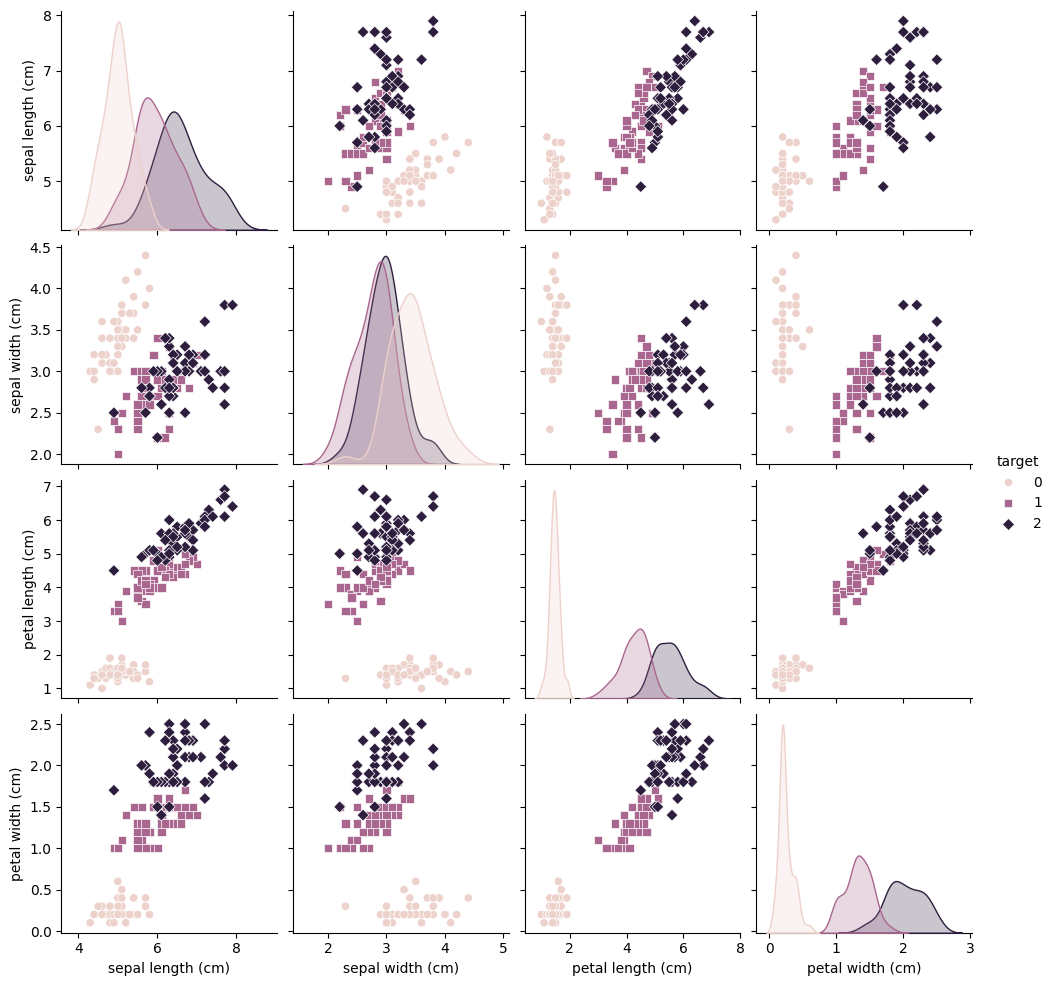

In [1]:
# Gerekli kütüphaneleri import edelim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Örnek veri setini yükleyelim (iris veri seti)
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Veri setinin özelliklerine göz atalım
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

print("Veri Setinin İlk Beş Satırı:")
print(df.head())

print("\nVeri Seti Özeti:")
print(df.describe())

print("\nSınıf Dağılımı:")
print(df['target'].value_counts())

# Veri setini görselleştirelim
sns.pairplot(df, hue='target', markers=["o", "s", "D"])
plt.show()


Veriyi eğitim ve test setlerine bölelim ve karar ağacı modelimizi oluşturalım ve eğitelim.

Doğruluk Oranı: 1.0

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Karışıklık Matrisi:


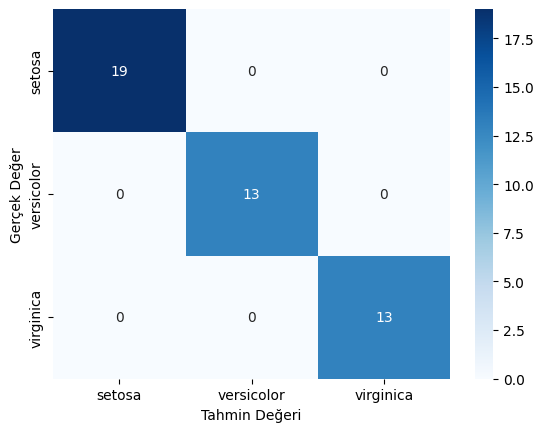

In [2]:
# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Karar ağacı modelimizi oluşturalım ve eğitelim
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Modelimizi test verisi üzerinde tahmin yapalım
y_pred = clf.predict(X_test)

# Model performansını değerlendirelim
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Oranı: {accuracy}")

print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

print("\nKarışıklık Matrisi:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Değeri')
plt.show()


Karar ağacını görselleştirelim.

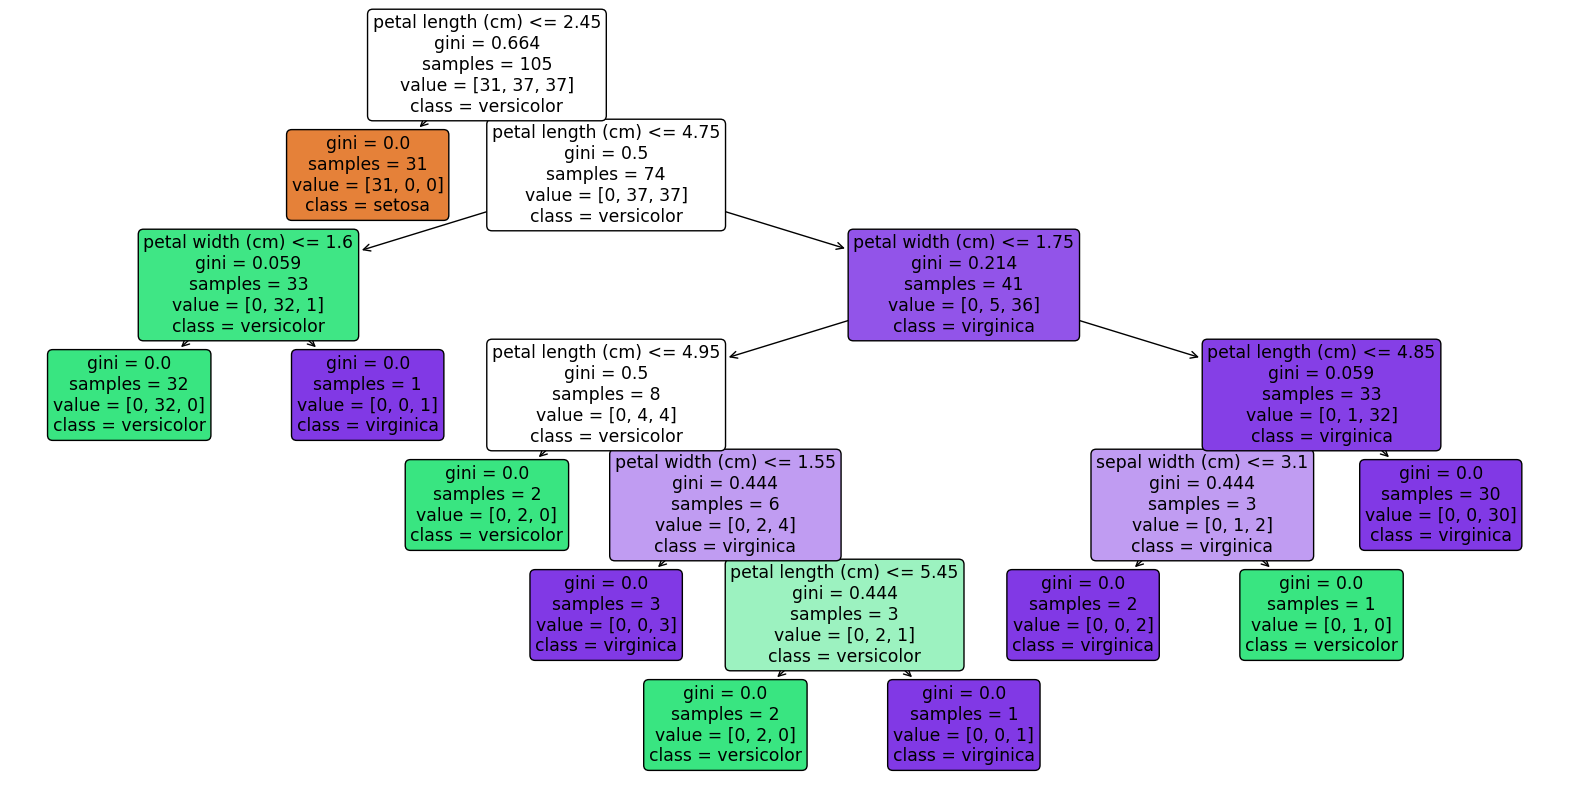

In [3]:
# Karar ağacını görselleştirelim
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()


### 4. Model Değerlendirmesi ve Karşılaştırmalar
Karar ağacı modelinin performansını, farklı veri setleri ve algoritmalar ile karşılaştırarak değerlendirebiliriz.

Örnek olarak, aynı veri seti üzerinde Lojistik Regresyon ve KNN algoritmalarını uygulayalım.

In [4]:
# Örnek olarak, aynı veri seti üzerinde Lojistik Regresyon ve KNN algoritmalarını uygulayalım.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Lojistik Regresyon
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Lojistik Regresyon Doğruluk Oranı: {accuracy_lr}")

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Doğruluk Oranı: {accuracy_knn}")


Lojistik Regresyon Doğruluk Oranı: 1.0
KNN Doğruluk Oranı: 1.0


### 5. Hiperparametre Optimizasyonu
Karar ağacı modelinin performansını arttırmak için hiperparametre optimizasyonu yapabiliriz. Örneğin, en iyi `max_depth` ve `min_samples_split` değerlerini `GridSearchCV` kullanarak bulabiliriz.

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"En İyi Hiperparametreler: {grid_search.best_params_}")
print(f"En İyi Doğruluk Oranı: {grid_search.best_score_}")

# En iyi model ile tahmin yapalım
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"En İyi Modelin Doğruluk Oranı: {accuracy_best}")


En İyi Hiperparametreler: {'max_depth': 5, 'min_samples_split': 10}
En İyi Doğruluk Oranı: 0.9428571428571428
En İyi Modelin Doğruluk Oranı: 1.0


En iyi modelin ağacını görselleştirelim.

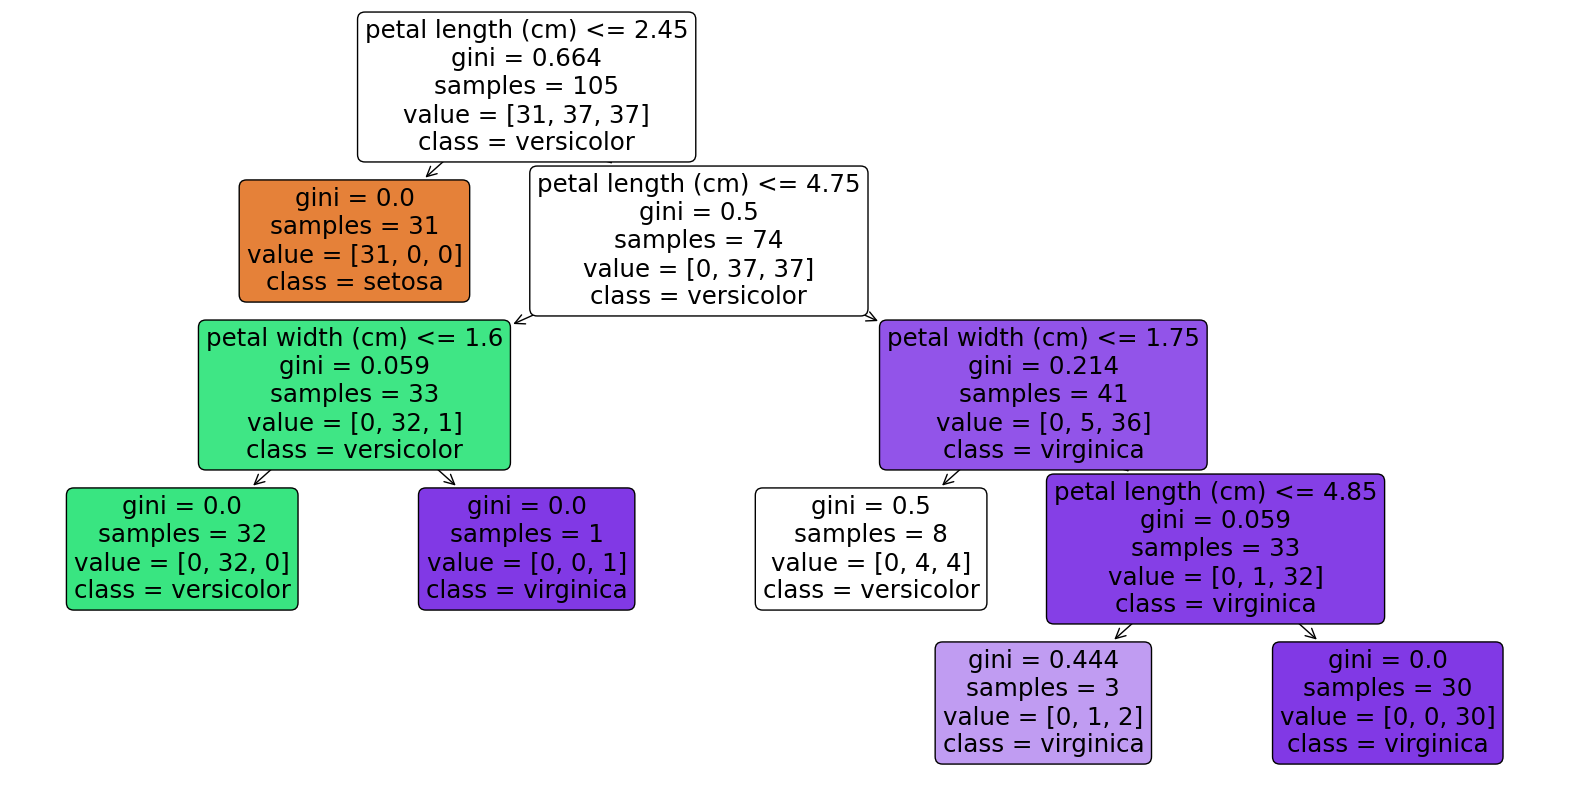

In [6]:
# En iyi modelin ağacını görselleştirelim
plt.figure(figsize=(20,10))
plot_tree(best_clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()


### 6. Sonuç ve Yorum
Karar ağaçları, veri setindeki ilişkileri kolayca görselleştirip anlamaya yardımcı olan güçlü bir algoritmadır. Ancak, aşırı öğrenme (overfitting) riski taşıdığı için dikkatli olunmalıdır. Hiperparametre optimizasyonu ile modelin performansı arttırılabilir. Diğer algoritmalarla karşılaştırıldığında, karar ağaçları özellikle anlaşılabilirlik ve yorumlanabilirlik açısından avantaj sağlar.